## roc-auc hoặc mse đơn biến (hay bất kỳ phép đo nào khác)

Quy trình này hoạt động như sau:

- Xây dựng mô hình trên mỗi đặc trưng để dự đoán mục tiêu.
- Đưa ra dự đoán sử dụng mô hình được tạo ra từ đặc trưng đã đề cập.
- Đo lường chất lượng của dự đoán đó, có thể là roc-auc (bài toàn phân loại), msse (bài toán hồi quy).
- Xếp hạng các đặc trưng theo phép đo (roc-auc hoặc mse).
- Chọn ra các đặc trưng có xếp hạng cao nhất.

Ở đây chúng ta sẽ minh họa cách lựa chọn đặc trưng dựa trên roc-auc hoặc mse đơn biến.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

## Hời quy

In [2]:
# load tập dữ liệu

data = pd.read_csv('./datatset/house-price/houseprice.csv')
data.shape

(1460, 81)

In [3]:
# Trên thực tế, nên thực hiện lựa chọn đặc trưng sau khi tiền xử lý dữ liệu,
# tất cả các biến hạng mục được mà hóa thành số,
# và rồi chúng ta có thể đánh giá tính tất định của các mục tiêu

# để đơn giản, chúng ta sẽ chỉ sử dụng biến dạng số
# lựa chọn các cột số:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [4]:
# chia thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

### Xác đinh mse đơn biến

In [6]:
## Yêu cầu 1
# xác đinh mse cho từng đặc trưng

# ở đây chúng ta lưu trữ các giá trị mse
mse_values = []

# lặp qua từng biến
for feature in X_train.columns:
    
    # huấn luyện cây quyết định
    clf = DecisionTreeRegressor()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    
    # đưa ra dự đoán
    y_scored = clf.predict(X_test[feature].fillna(0).to_frame())
    
    # xác định mse và lưu trữ nó
    ## VIẾT CODE Ở ĐÂY:
    mse_values.append(mean_squared_error(y_test, y_scored))
    
    
# hiển thị kết quả
mse_values[0:10]

[13268032828.324202,
 5258423546.061133,
 6827291221.813821,
 8379936849.301367,
 2097026635.6820993,
 6026309350.815287,
 4776574901.81357,
 5138584000.327346,
 7867108586.811187,
 7696158357.724333]

<details><summary> Gợi ý </summary>

[mean_squared_error()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

</details>

<AxesSubplot:>

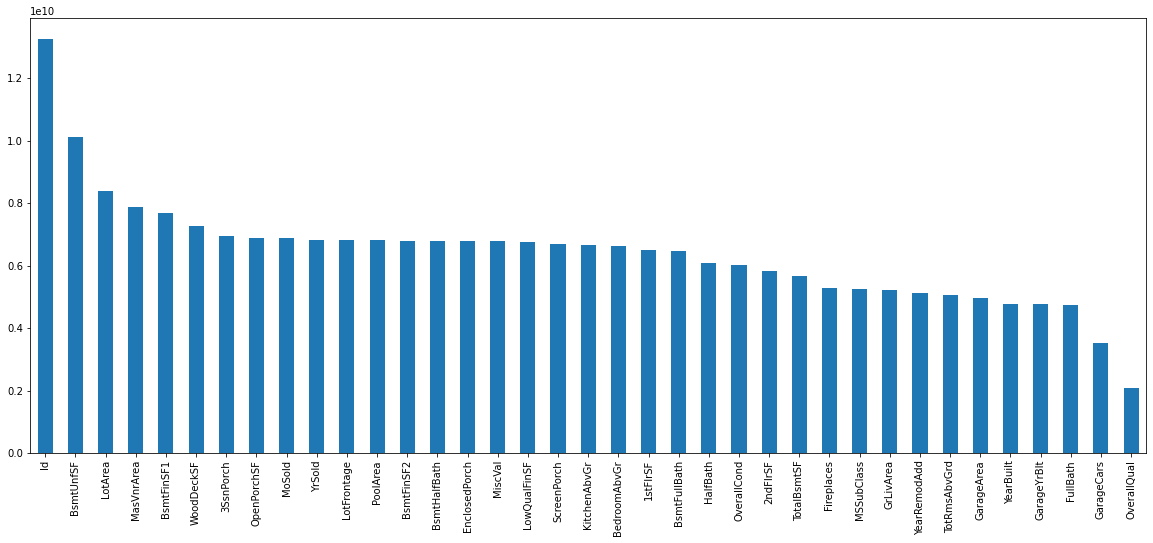

In [7]:
## Yêu cầu 2
# hãy:

# 1) thu nạp các giá trị mse trong pandas series
# 2) thêm tên biến vào index
# 3) sắp xếp các đặc trưng theo mse
# 4) tạo biểu đồ cho các biến

## VIẾT CODE Ở ĐÂY:
mse_values = pd.Series(mse_values)
mse_values.index = X_train.columns
## VIẾT CODE Ở ĐÂY:
mse_values.sort_values(ascending=False).plot.bar(figsize=(20,8))

Hãy nhớ với hồi quy, mse càng nhỏ thì chất lượng mô hình càng tốt.

Để lựa chọn đặc trưng, chúng ta cần một ngưỡng hoặc giới hạn. Để theo dõi việc triển khai lựa chọn của Scikit-learn, chúng ta sẽ chọn các đặc trưng có mse thấp hơn mse trung bình. 

### Lựa chọn đặc trưng

In [9]:
## Yêu cầu 3

## VIẾT CODE Ở ĐÂY:
selected_features = mse_values[ mse_values < np.mean(mse_values)].index

selected_features

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea'],
      dtype='object')

In [10]:
## Yêu cầu 4
# lựa chọn đặc trưng trong dataframe

## VIẾT CODE Ở ĐÂY:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

X_train.shape, X_test.shape

((1022, 15), (438, 15))

Chúng ta sẽ dùng phương pháp này trong các dự án, đặc biệt khi có quá nhiều đặc trưng và cần nhanh chóng giảm không gian đặc trưng.

Xem ví dụ trong [phát biểu tại PyData London](https://www.youtube.com/watch?v=KHGGlozsRtA)
